In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
%cd 'gdrive/MyDrive/Colab Notebooks/Librairiee_5/'

/content/gdrive/MyDrive/Colab Notebooks/Librairiee_5


## **Analyse du comportement client**

Ma mission ici pour Lapage est d'analyser les forces, les faiblesses et le comportement des clients de Lapage.

Il m'a également été demandé d'analyser la relation entre le sexe d'un client et les catégories de livres achetés, puis le lien entre l'âge des clients et le montant total des achats, la fréquence d'achat, la taille moyenne du panier et les catégories de livres achetés.

Résumé :

III. Analyse du comportement du client
 1. Relation entre le sexe du client et la catégorie d'achat

 -- a. Tableau de contingence et carte thermique

 -- b. Test du chi carré

 2. Analyse du comportement des clients selon leur âge

  -- a. Calculs et matrice de Pearson

  -- b. Âge des clients vs fréquence d'achat

  -- c. Âge des clients par rapport au montant total de l'achat

  -- d. Âge des clients vs panier moyen

  -- e. Âge des clients vs catégorie de livres achetés


3. Conclusion (partie 3)

In [4]:
#IMPOrtation de biblioteque


In [5]:
import math
import scipy.stats as st # tests shapiro et spearman
import statsmodels.api as sm #pvalue
#import pingouin as pg # test anova
import statsmodels.api as sm #anova test
import statsmodels.formula.api as smf # test anova
from statsmodels.formula.api import ols #test anova
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns
import warnings

In [6]:
#shapiro-wilk test
def shapiro_test(x):
    from scipy.stats import shapiro
    x1, pval1 = shapiro(x)

    print("="*100,"\n")
    print("Shapiro-Wilk test")
    if pval1 < 0.05:
        print("L'hypothèse nulle est rejetée \t ==> La variable ne suit pas une loi normale")
    else:
        print("On ne peut pas rejeter l'hypothèse nulle H0  (La variable suit  une loi normale)")
    print()
    print("="*100,"\n")

#spearman test
def spearman_test(x,y):
    print("="*100, "\n")
    print("Test d'Independence (Spearman's Test)\n")

    rs = st.spearmanr(x,y)[0]
    pvalue = st.spearmanr(x,y)[1]

    if abs(rs) < .10:
        qual = 'negligable (ou null)'
    elif abs(rs) < .20:
        qual = 'flaible'
    elif abs(rs) < .40:
        qual = 'moderé'
    elif abs(rs) < .60:
        qual = 'assez élévé'
    elif abs(rs) < .80:
        qual = 'élévé'
    else:
        qual = 'tres élévé'

    print("Spearman coeff =",rs)
    print("Spearman pvalue =",pvalue)
    print()

    if rs == 0:
        print("On ne peut pas rejeter l'hypothèse nulle H0 (les variables sont indépendantes)")
    elif rs < 0 :
        if pvalue < 0.05:
            print("Les variables présentent une corrélation significativement {} négative".format(qual))
        else:
            print("Les variables ont une faible corrélation négative significative ".format(qual))
    elif rs > 0:
        if pvalue < 0.05:
            print("Les variables présentent une corrélation significativement {} positive".format(qual))
        else:
            print("Les variables ont une faible corrélation positive significative".format(qual))

In [7]:
#importation lapage b2c database
lapage_df_b2c = pd.read_csv('export_lapage_df_b2c.csv', sep=';')
#date convertion
lapage_df_b2c['date'] = pd.to_datetime(lapage_df_b2c['date'])
#supression de la 1ere colone du dataframe
lapage_df_b2c.drop('Unnamed: 0', 1, inplace=True)
lapage_df_b2c

<ipython-input-7-d66545e4d8a3>:6: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  lapage_df_b2c.drop('Unnamed: 0', 1, inplace=True)


,id_prod,time,session_id,client_id,date,year,period,sex,birth,age,price,categ,age_groups
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103,2022-05-20,2022,2022-05,f,1986,37,4.18,0,36 - 45 ans
1,1_251,2022-02-02 07:55:19.149409,s_158752,c_8534,2022-02-02,2022,2022-02,m,1988,35,15.99,1,26 - 35 ans
2,2_209,2021-06-24 04:19:29.835891,s_52962,c_6941,2021-06-24,2021,2021-06,m,2000,23,69.99,2,16 - 25 ans
3,0_1509,2023-01-11 08:22:08.194479,s_325227,c_4232,2023-01-11,2023,2023-01,m,1980,43,4.99,0,36 - 45 ans
4,0_1418,2022-10-20 15:59:16.084030,s_285425,c_1478,2022-10-20,2022,2022-10,f,1972,51,8.57,0,46 - 55 ans
...,...,...,...,...,...,...,...,...,...,...,...,...,...
612621,0_1551,2022-01-15 13:05:06.246925,s_150195,c_8489,2022-01-15,2022,2022-01,f,1951,72,12.99,0,66 - 75 ans
612622,1_639,2022-03-19 16:03:23.429229,s_181434,c_4370,2022-03-19,2022,2022-03,f,1977,46,10.99,1,46 - 55 ans
612623,0_1425,2022-12-20 04:33:37.584749,s_314704,c_304,2022-12-20,2022,2022-12,f,1988,35,12.99,0,26 - 35 ans
612624,0_1994,2021-07-16 20:36:35.350579,s_63204,c_2227,2021-07-16,2021,2021-07,m,1986,37,4.98,0,36 - 45 ans


## **III. ANALYSE DE LA CORELATIONS AVEC LES CLIENTS**

 **1. Relation entre le sexe du client et la catégorie d'achat**


**a. Tableau de contingence entre sexe et catégorie et heatmap**

In [8]:
# Tableau de contingence entre sexe et catégorie et heatmap
X, Y = "sex", "categ"
cont_table = lapage_df_b2c[[X,Y]].pivot_table(index=X,columns=Y,aggfunc=len)
cont_table

categ,0,1,2
sex,,,
f,192025,110550,16429
m,178044,100227,15351


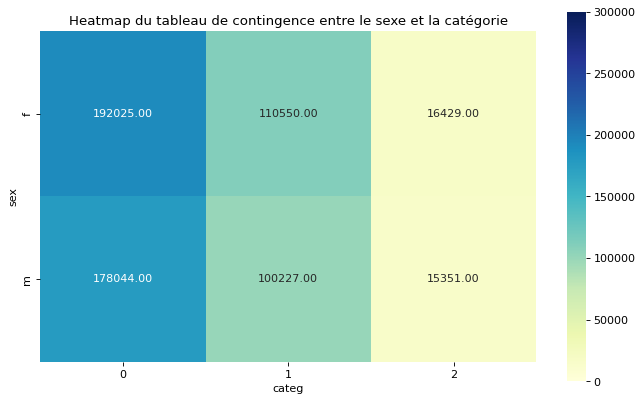

In [9]:
# Affichage
#heatmap du tableau de contingence entre sexe et catégorie
fig = plt.figure(num=None, figsize=(10, 6), dpi=80, facecolor='w', edgecolor='k')
plt.clf()
ax = fig.add_subplot(111)
ax.set_aspect(1)
res = sns.heatmap(cont_table, annot=True, fmt='.2f', cmap="YlGnBu", vmin=0.0, vmax=300000.0)
plt.title("Heatmap du tableau de contingence entre le sexe et la catégorie",fontsize=12)
#plt.savefig("Heatmap du tableau de contingence entre le sexe et la catégorie.png", bbox_inches='tight')
plt.show()

Notes :
* Les femmes comme les hommes préfèrent respectivement les catégories 0, 1 et 2 enfin
* Les catégories d'achat ne diffèrent pas selon le sexe du client
* On constate seulement que les femmes consomment un peu plus que les hommes sur les 3 catégories de produits

** b. Test du chi carré**

Le test du chi carré est un test statistique qui va permettre de se prononcer sur le lien entre deux variables qualitatives. Comment peut-on dire que les deux variables de notre distribution ne sont pas indépendantes ? En d'autres termes, comment savoir si deux variables n'ont pas de relation statistique entre elles ?

Situation : variable qualitative (sexe) vs variable qualitative (catégorie)

Question : La catégorie des livres achetés est-elle dépendante du sexe des clients ?

Outil : test du chi carré

In [10]:
# test independence chi-square
print("="*100,"\n")
print("Test d'indépendance entre le genre et la catégorie (test du chi carré)")
print("\t Hypothèse nulle H0 : \t \t La préférence pour une catégorie de livre ne dépend pas du sexe du client")
print("\t Hypothèse alternative H1 : \t La préférence pour une catégorie dépend du sexe du client")
print('')

#chi-square and p-value calculation
conti = lapage_df_b2c[[X, Y]].pivot_table(index=X, columns=Y, aggfunc=len).fillna(0).copy()
st_chi2, st_p, st_dof, st_exp = st.chi2_contingency(conti)
print("Le khi-deux est de : ",st_chi2,"\n")
print("La p-value est de :",st_p,"\n")

if st_p < 0.05:
    print("L'hypothèse nulle est rejetée \t ==> H1 : La préférence pour une catégorie dépend du sexe du client")
else:
    print("On ne peut pas rejeter l'hypothèse nulle H0 (La préférence pour une catégorie de livre ne dépend pas du sexe du client")


Test d'indépendance entre le genre et la catégorie (test du chi carré)
	 Hypothèse nulle H0 : 	 	 La préférence pour une catégorie de livre ne dépend pas du sexe du client
	 Hypothèse alternative H1 : 	 La préférence pour une catégorie dépend du sexe du client

Le khi-deux est de :  18.75788251563821 

La p-value est de : 8.448460261159054e-05 

L'hypothèse nulle est rejetée 	 ==> H1 : La préférence pour une catégorie dépend du sexe du client


notes :
Pour α = 5%, le sexe des clients dépend de la catégorie de livres achetés

**2. Analyse du comportement des clients selon leur âge**

**a. Calculs et matrice de Pearson**

In [11]:
##lapage_df_b2c regrouper par age et age_groups
lapage_df_b2c_age = lapage_df_b2c.groupby(["age", "age_groups",]).agg({"id_prod":"count","price":"sum"}).reset_index()
lapage_df_b2c_age.rename(columns={"price":"total_purchase_amount", "id_prod":"purchase_frequency"}, inplace=True)

#calcul des variables "montant total d'achat", "fréquence d'achat" et "panier moyen" pour les clients B2C
lapage_df_b2c_age["average_basket"] = round(lapage_df_b2c_age["total_purchase_amount"] / lapage_df_b2c_age["purchase_frequency"],2)
lapage_df_b2c_age["purchase_frequency"].isin(lapage_df_b2c_age["age"]==40)
lapage_df_b2c_age


,age,age_groups,purchase_frequency,total_purchase_amount,average_basket
0,19,16 - 25 ans,14769,591414.23,40.04
1,20,16 - 25 ans,4238,172831.75,40.78
2,21,16 - 25 ans,4468,178799.11,40.02
3,22,16 - 25 ans,4161,174347.66,41.90
4,23,16 - 25 ans,4299,160576.49,37.35
...,...,...,...,...,...
71,90,76 ans - plus,315,5089.62,16.16
72,91,76 ans - plus,293,4803.64,16.39
73,92,76 ans - plus,164,2691.19,16.41
74,93,76 ans - plus,222,3959.24,17.83


<ipython-input-12-a98c084db64d>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  mask = np.triu(np.ones_like(lapage_df_b2c_age.corr(), dtype=bool))
<ipython-input-12-a98c084db64d>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(lapage_df_b2c_age.corr(), mask=mask, vmin=-1, vmax=1, annot=True, linewidths=2)


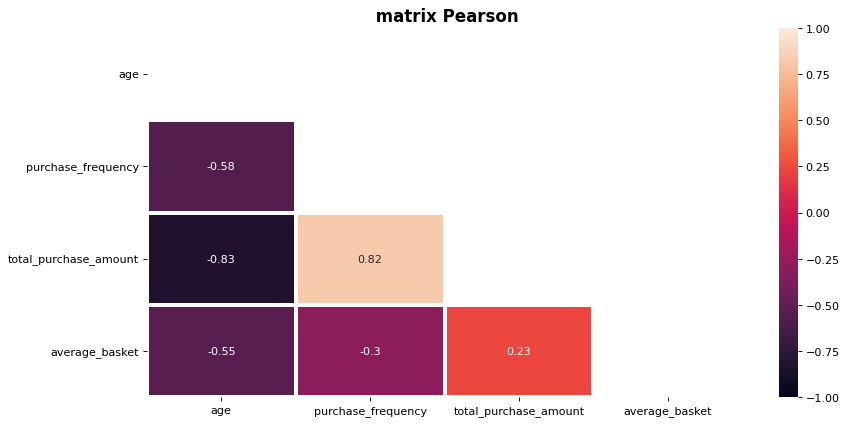

In [12]:
# affichage
fig = plt.figure(num=None, figsize=(12, 6), dpi=80)
mask = np.triu(np.ones_like(lapage_df_b2c_age.corr(), dtype=bool))
sns.heatmap(lapage_df_b2c_age.corr(), mask=mask, vmin=-1, vmax=1, annot=True, linewidths=2)
plt.savefig("Partie_3  matrix Pearson", bbox_inches='tight')
plt.title(" matrix Pearson", fontsize = 15, fontweight='bold');

Il semble y avoir une forte corrélation négative entre l'âge du client et son montant total d'achat, sa fréquence d'achat et son panier moyen respectivement

**b. age du client vs frequence achat**


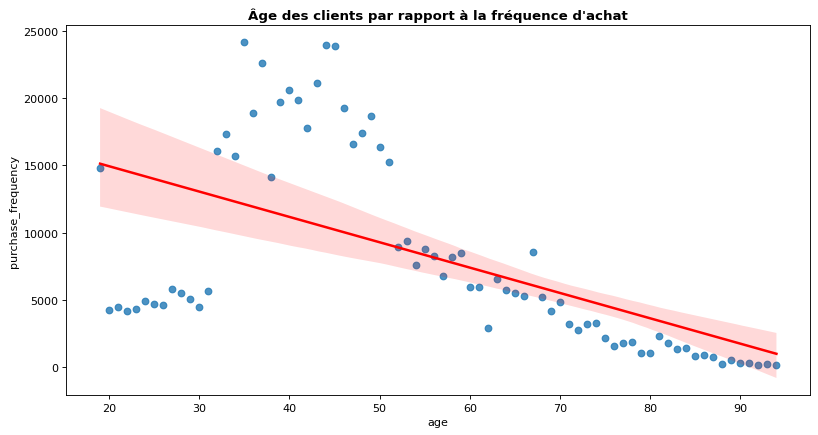

In [13]:
#nuages de point
fig = plt.figure(num=None, figsize=(12, 6), dpi=80)
line_kws = {'color' : 'r',}
sns.regplot(data=lapage_df_b2c_age[lapage_df_b2c_age["age"] > 18], x= "age",y = "purchase_frequency", line_kws=line_kws)
plt.title("Âge des clients par rapport à la fréquence d'achat",fontsize = 12, fontweight='bold')
#plt.savefig("Partie 3 Âge des clients par rapport à la fréquence d'achat", bbox_inches='tight')
plt.show()

notes: :
* D'un point de vue général, la fréquence des achats diminue avec l'âge

## Tests de Shapiro-wilk (loi normale) et de Spearman
Le test de Shapiro-Wilk peut être utilisé pour décider si un échantillon correspond ou non à une distribution normale, et il est couramment utilisé pour les petits échantillons.

Situation : variable ordinale (âge) et variable quantitative (fréquence des achats)

Question : La fréquence des achats suit-elle une loi normale ?

Outil : test de shapiro-wilk

In [14]:
#test shapiro
shapiro_test(lapage_df_b2c_age["purchase_frequency"])
shapiro_test(lapage_df_b2c_age["age"])


Shapiro-Wilk test
L'hypothèse nulle est rejetée 	 ==> La variable ne suit pas une loi normale



Shapiro-Wilk test
L'hypothèse nulle est rejetée 	 ==> La variable ne suit pas une loi normale




notes :
* La fréquence d'achat et l'âge des clients ne suivent pas une loi normale → Test de Spearman

**La corrélation de Spearman est souvent utilisée pour évaluer les relations impliquant des variables ordinales.**

In [15]:
#test spearman
spearman_test(lapage_df_b2c_age["age"],lapage_df_b2c_age["purchase_frequency"])


Test d'Independence (Spearman's Test)

Spearman coeff = -0.6737935748462065
Spearman pvalue = 2.5520940213877932e-11

Les variables présentent une corrélation significativement élévé négative


notes :
L'âge des clients et leur fréquence d'achat sont corrélés négativement, ce qui signifie ici : plus le client est âgé, moins il achète

## **c. Âge des clients par rapport au montant total de l'achat**

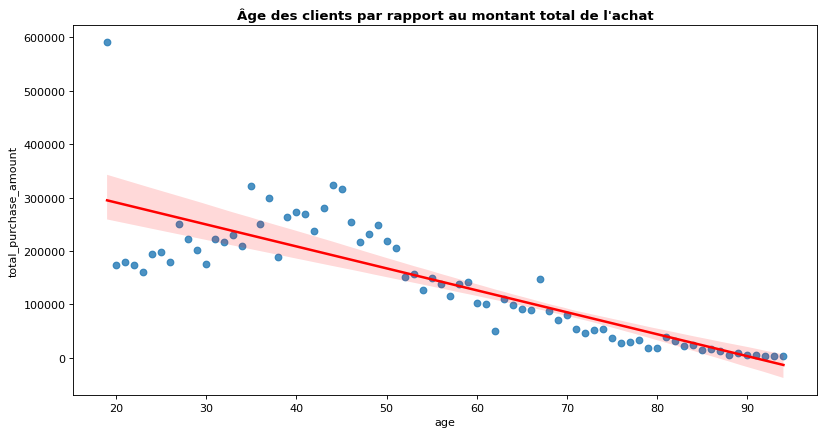

In [16]:
#nuage de point
fig = plt.figure(num=None, figsize=(12, 6), dpi=80)
line_kws = {'color' : 'r',}
sns.regplot(data=lapage_df_b2c_age[lapage_df_b2c_age["age"] > 18], x= "age",y = "total_purchase_amount", line_kws=line_kws)
plt.title("Âge des clients par rapport au montant total de l'achat",fontsize = 12, fontweight='bold')
plt.savefig("Part_3 Âge des clients par rapport au montant total de l'achat", bbox_inches='tight')
plt.show()

nb:
* D'un point de vue général, le montant total d'achat diminue avec l'âge (même s'il est positif jusqu'à 40 ans)

**Situation** : variable ordinale (âge) et variable quantitative (montant total d'achat)
**Question** : Le montant total de l'achat suit-il une loi normale ?

**Outil** : test de shapiro-wilk



In [17]:
#shapiro test
shapiro_test(lapage_df_b2c_age["total_purchase_amount"])


Shapiro-Wilk test
L'hypothèse nulle est rejetée 	 ==> La variable ne suit pas une loi normale




notes :

Le montant total de l'achat ne suit pas une loi normale → Test de Spearman

In [18]:
#spearman test
spearman_test(lapage_df_b2c_age["age"],lapage_df_b2c_age["total_purchase_amount"])


Test d'Independence (Spearman's Test)

Spearman coeff = -0.8740396445659603
Spearman pvalue = 6.668764227215193e-25

Les variables présentent une corrélation significativement tres élévé négative


note :
* L'âge des clients et leur montant total d'achat sont très négativement corrélés, ce qui signifie ici : plus le client est âgé, moins il achète

## **d. Age des clients vs panier moyen**


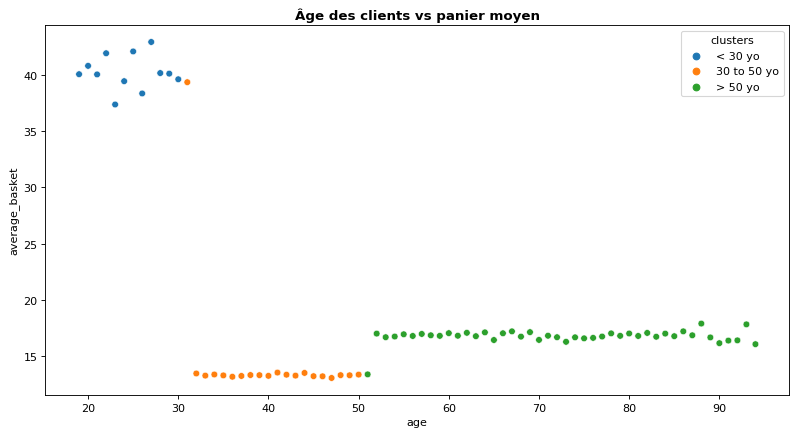

In [19]:
#nuage de point
fig = plt.figure(num=None, figsize=(12, 6), dpi=80)
lapage_df_b2c_age["clusters"]= pd.cut(lapage_df_b2c_age["age"], bins=[15,30,50,100], labels=["< 30 yo","30 to 50 yo","> 50 yo"])
sns.scatterplot(data=lapage_df_b2c_age, x="age", y="average_basket", hue="clusters")
plt.title("Âge des clients vs panier moyen",fontsize = 12, fontweight='bold');

notes :

Pour les clients...
* ... moins de 30 ans : panier moyen élevé (plus de 35 euros)
* ... entre 30 et 50 ans : panier moyen bas (moins de 15 euros)
* ... plus de 50 ans : panier moyen entre 15 et 20 euros

**Situation** : variable ordinale (âge) et variable quantitative (panier moyen)

**Question** : Le panier moyen suit-il une loi normale ?

**Outil** : test de shapiro-wilk

In [20]:
#shapiro test
shapiro_test(lapage_df_b2c_age["average_basket"])


Shapiro-Wilk test
L'hypothèse nulle est rejetée 	 ==> La variable ne suit pas une loi normale




**Le test de Kolmogorov-Smirnov**
La statistique de Kolmogorov-Smirnov quantifie une distance entre les fonctions de distribution empiriques de deux échantillons.

**Question** : L'âge des clients et la fréquence d'achat ont-ils la même distribution ?

**Outil** : test de Kolmogorov-Smirnov

In [21]:
#K-S test
from scipy.stats import ks_2samp
ks_2samp(lapage_df_b2c_age["age"], lapage_df_b2c_age["average_basket"])

KstestResult(statistic=0.8289473684210527, pvalue=1.1874582768381313e-26, statistic_location=17.9, statistic_sign=-1)

nb :
* D'après la sortie, nous pouvons voir que la statistique de test est 0,8289473684210527 et la valeur p correspondante est 1,1874582768381313e-26. Puisque la valeur de p est inférieure à 0,05, nous rejetons l'hypothèse nulle.
* Nous avons suffisamment de preuves pour dire que les deux ensembles de données d'échantillon ne proviennent pas de la même distribution.
Avis :
* **rmq**

Le panier moyen ne suit pas une loi normale → Test de Spearman

In [22]:
#spearman test
spearman_test(lapage_df_b2c_age["age"],lapage_df_b2c_age["average_basket"])


Test d'Independence (Spearman's Test)

Spearman coeff = -0.08771678004687013
Spearman pvalue = 0.4511629035932885

Les variables ont une faible corrélation négative significative 


Nb :
La relation entre l'âge des clients et le panier moyen n'est pas significative

## **e. Âge des clients vs catégorie de livres achetés**

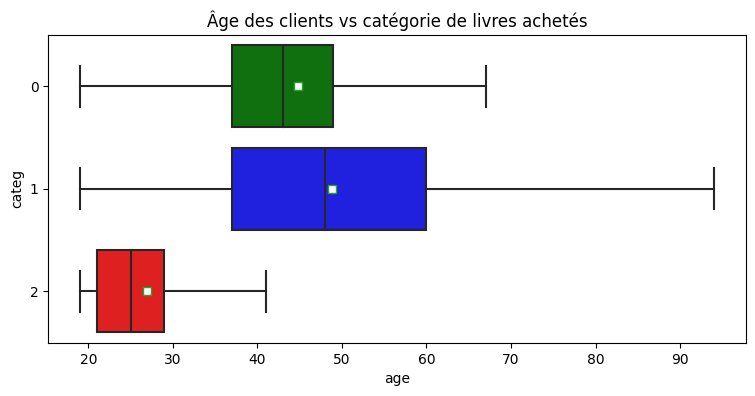

In [23]:
#box plot
plt.figure(figsize=(9,4))
palette = ['g','b','r']
meanprops={ "marker" : "s", "markerfacecolor" : "w"}
sns.boxplot(data=lapage_df_b2c, y='categ', x='age', orient='h', showfliers=False, showmeans=True, palette=palette, meanprops=meanprops)
plt.title("Âge des clients vs catégorie de livres achetés")
plt.show()

notes:

* Catégorie 0 : Clients âgés de 19 à 67 ans (avec une moyenne d'âge approximative de 45 ans)

* Catégorie 1 : Tout le monde (avec une moyenne d'âge approximative de 48 ans)

* Catégorie 2 : Clients âgés de 19 à 40 ans (avec une moyenne d'âge approximative de 27 ans)

**Situation** : variable qualitative (âge) vs variable qualitative (catégorie)
**Question** : La catégorie des livres achetés a-t-elle une dépendance à l'âge des clients ?
**Outils** : test du chi carré

In [24]:
#chi-square independence test
print("="*100,"\n")
print("Test d'indépendance entre l'âge et la catégorie (test du chi carré)")
print("\t Hypothèse nulle H0 : \t \t La préférence pour une catégorie de livre ne dépend pas de l'âge du client")
print("\t Hypothèse alternative H1 : \t La préférence pour une catégorie dépend de l'âge du client")
print('')

#chi-square and p-value calculation
X2, Y2 = "age", "categ"
conti2 = lapage_df_b2c[[X2, Y2]].pivot_table(index=X2, columns=Y2, aggfunc=len).fillna(0).copy()
st_chi2, st_p, st_dof, st_exp = st.chi2_contingency(conti2)
print("Le khi-deux est de : ",st_chi2,"\n")
print("La p-value est de :",st_p,"\n")

if st_p < 0.05:
    print("L'hypothèse nulle est rejetée \t ==> H1 : La préférence pour une catégorie dépend de l'âge du client")
else:
    print("On ne peut pas rejeter l'hypothèse nulle H0 (La préférence pour une catégorie de livre ne dépend pas de l'âge du client")


Test d'indépendance entre l'âge et la catégorie (test du chi carré)
	 Hypothèse nulle H0 : 	 	 La préférence pour une catégorie de livre ne dépend pas de l'âge du client
	 Hypothèse alternative H1 : 	 La préférence pour une catégorie dépend de l'âge du client

Le khi-deux est de :  265788.8875687019 

La p-value est de : 0.0 

L'hypothèse nulle est rejetée 	 ==> H1 : La préférence pour une catégorie dépend de l'âge du client


In [27]:

from scipy import stats


data=lapage_df_b2c #, y='categ', x='age'

#  test ANOVA
groups = []
for i in range(3):
    group = data[data['categ'] == i]['age']
    groups.append(group)

_, p_value = stats.f_oneway(*groups)
print("P-Value du test ANOVA  est:", p_value)


P-Value du test ANOVA  est: 0.0


# notes:

Dans le contexte de l'ANOVA entre une variable quantitative (âge) et une variable qualitative (catégorie), une p-value de 0,0 suggère qu'il existe des différences significatives dans les moyennes des âges entre les différentes catégories.

Cela implique qu'il ya une association significative entre l'age des clients et la categorie de livre achété.

Lorsque la p-value est très petite, cela renforce la confiance dans le rejet de l'hypothèse nulle, qui stipule qu'il n'y a pas de différences significatives entre les 2 variables. Dans ce cas, on peut conclure qu'il y a une association statistiquement significative entre l'âge et la catégorie de livres achétés.

NOTES :
* Pour α = 5%, la catégorie de livres achetés dépend de l'âge des clients


## **Conclusion (partie 3)**

**Relation entre le sexe du client et la catégorie d'achat :**

* Les femmes comme les hommes préfèrent respectivement les catégories 0, 1 et 2 enfin
* Les femmes consomment un peu plus que les hommes sur les 3 catégories de produits
* Pour α = 5%, le sexe des clients dépend de la catégorie de livres achetés

**Relation entre l'âge des clients et la fréquence d'achat :**

* D'un point de vue général, la fréquence des achats diminue avec l'âge
* La fréquence d'achat et l'âge des clients ne suivent pas une loi normale
* L'âge des clients et leur fréquence d'achat sont négativement corrélés, ce qui signifie ici : plus le client est âgé, moins il achète

**Relation entre l'âge des clients et le montant total des achats :**

* D'un point de vue général, le montant total d'achat diminue avec l'âge (même s'il est positif jusqu'à 40 ans)
* Le montant total de l'achat ne suit pas une loi normale
* L'âge des clients et leur montant total d'achat sont très négativement corrélés, ce qui signifie ici : plus le client est âgé, moins il achète

**Relation entre l'âge des clients et le panier moyen :**

* Nous avons suffisamment de preuves pour dire que les deux ensembles de données d'échantillon ne proviennent pas de la même distribution.
* Le panier moyen ne suit pas une loi normale
* La relation entre l'âge des clients et le panier moyen n'est pas significative

**Relation âge des clients vs catégorie de livres achetés :**

* Pour α = 5%, la catégorie de livres achetés dépend de l'âge des clients